In [159]:
# importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [160]:
# reading the data and inspecting the first 5 rows
df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
# inspecting the last 5 rows
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [162]:
# looking at the descriptive statistics of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='target', ylabel='count'>

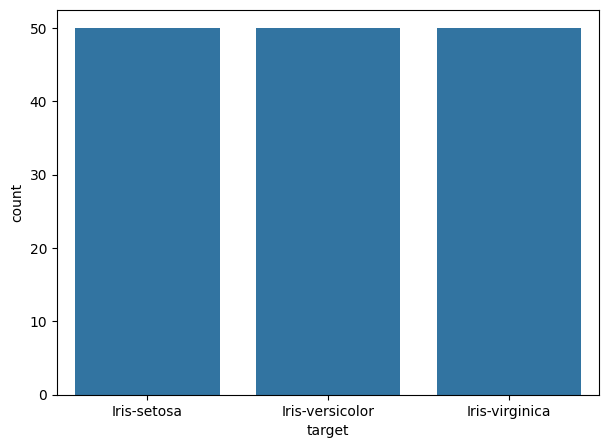

In [163]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(ax=ax, data=df, x='target')

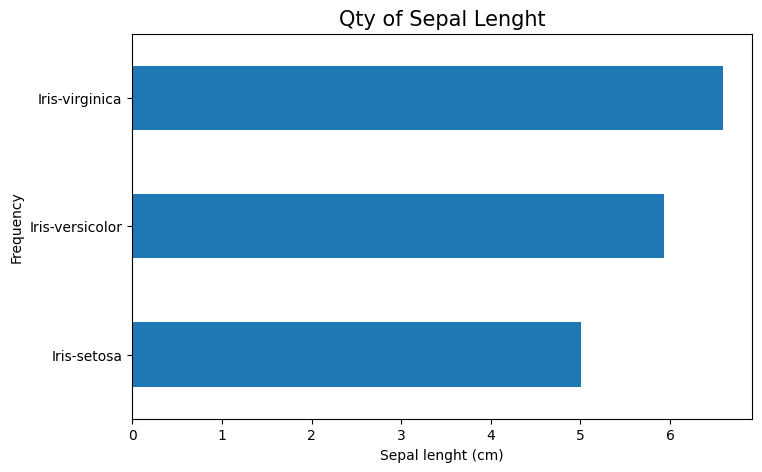

In [164]:
plt.figure(figsize=(8, 5))
df.groupby('target')["sepal length (cm)"].mean().plot(kind="barh")
plt.title("Qty of Sepal Lenght", fontsize=15)
plt.xlabel("Sepal lenght (cm)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()

<Axes: ylabel='target'>

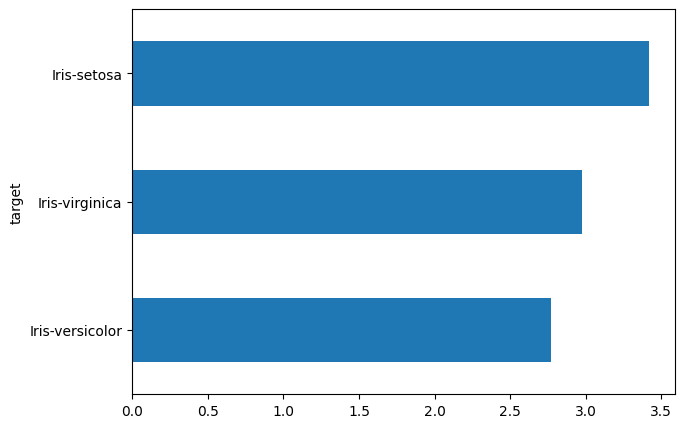

In [165]:
plt.figure(figsize=(7, 5))
df.groupby('target')["sepal width (cm)"].mean().sort_values().plot(kind="barh")

<Axes: ylabel='target'>

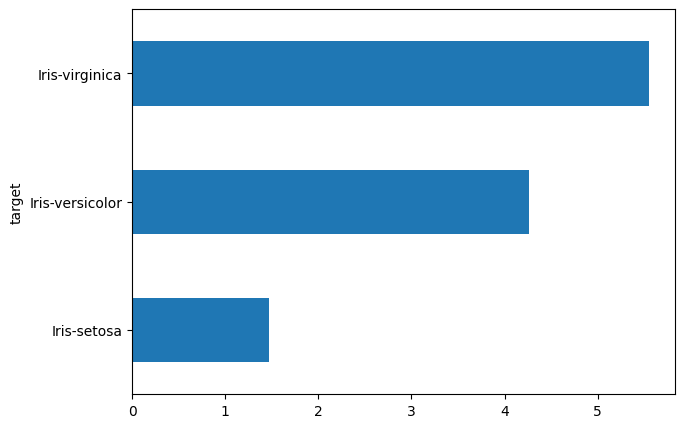

In [166]:
plt.figure(figsize=(7, 5))
df.groupby('target')["petal length (cm)"].mean().sort_values().plot(kind="barh")

<Axes: ylabel='target'>

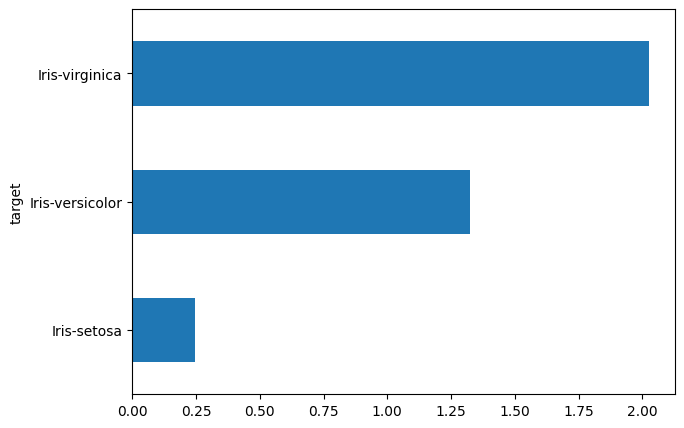

In [167]:
plt.figure(figsize=(7, 5))
df.groupby('target')["petal width (cm)"].mean().sort_values().plot(kind="barh")

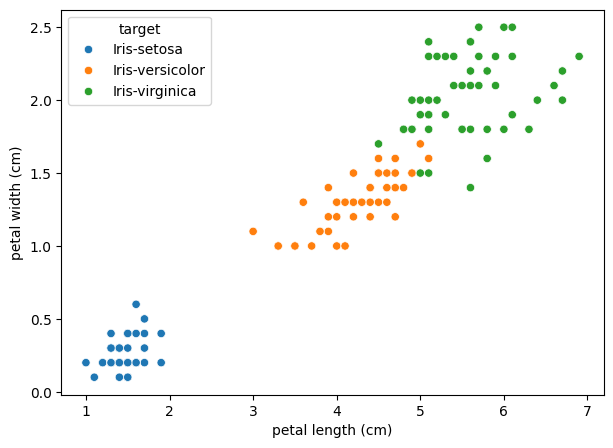

In [168]:

fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(ax=ax, data=df, x='petal length (cm)', y='petal width (cm)', hue='target');

<Figure size 800x600 with 0 Axes>

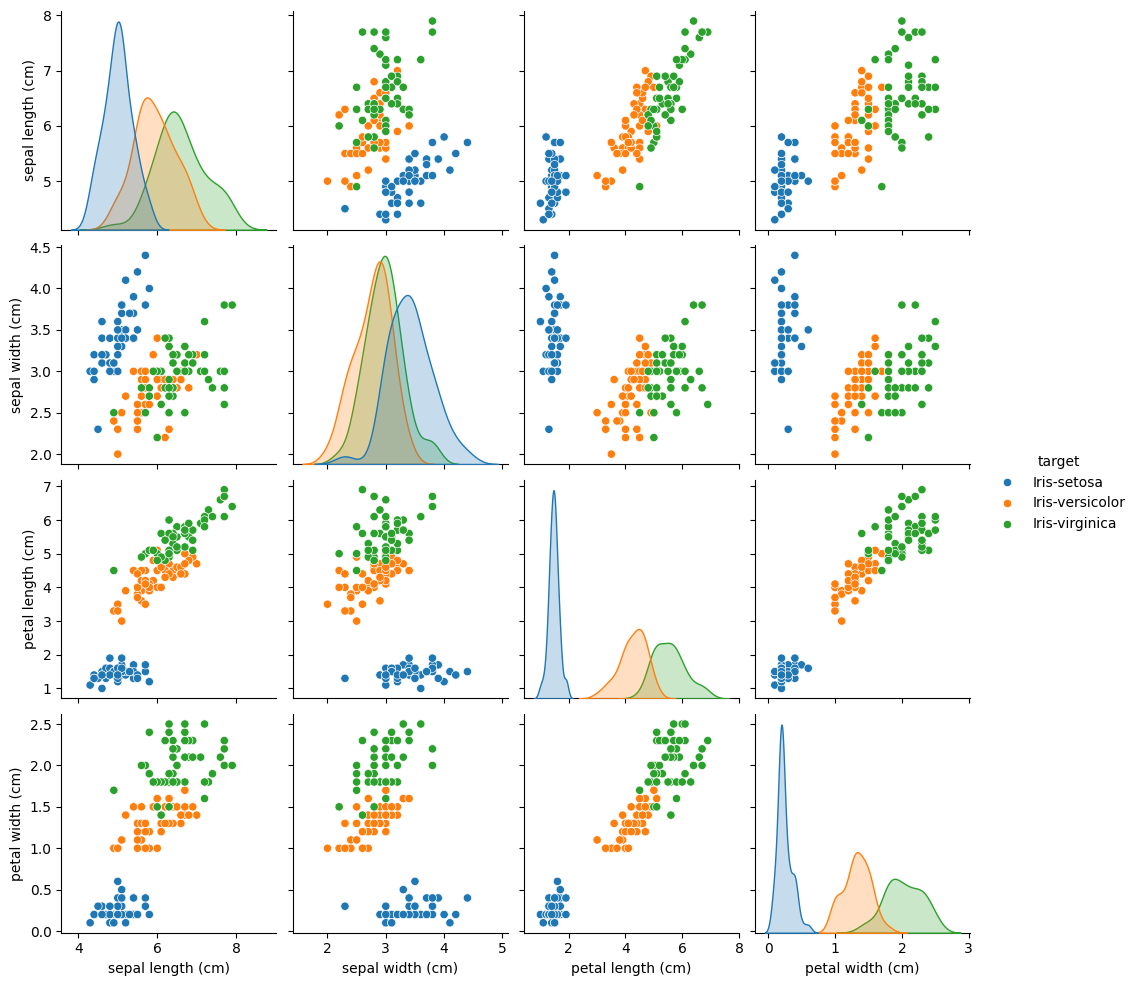

In [169]:
#visualizing the distribution of the predictors using pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue="target")

In [170]:
# defining the predictor and target variables
X = df.drop(["target"], axis=1)
y = df["target"]

<Axes: >

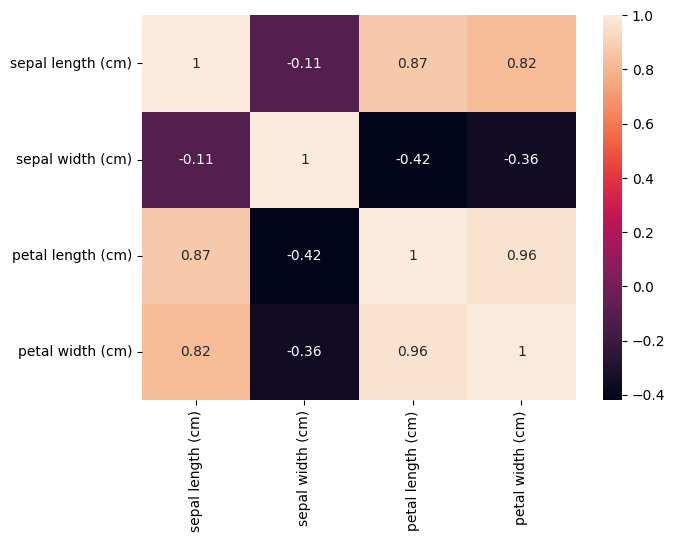

In [171]:
# visualizing for correlation among features

plt.figure(figsize=(7, 5))
sns.heatmap(X.corr(), annot=True)

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [173]:
# splitting the data into train and test set for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=11)

In [174]:
# instantiating and fitting the RandomForest model
forest = RandomForestClassifier(
                                random_state=11, 
                                n_estimators=5, 
                                criterion="gini", 
                                min_samples_split=10, 
                                min_impurity_decrease=2,
                                max_leaf_nodes=3,
                                max_depth=7,
                                verbose=True
                                )
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=3, min_impurity_decrease=2,
                       min_samples_split=10, n_estimators=5, random_state=11,
                       verbose=True)

In [175]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
param = {
        "n_estimators": range(0, 100, 10),
         "max_depth" : range(5, 50, 10),
        "n_jobs" : range(5, 50, 5)
        }
         #"min_samples_split" : [0.1, 0.5], 
         #"max_features" : [10, 50]}

In [178]:
grid = GridSearchCV(param_grid=param, 
                    cv=2,
                    n_jobs=-1,
                    estimator= forest,
                    verbose=True)

grid.fit(X_train, y_train)

Fitting 2 folds for each of 450 candidates, totalling 900 fits


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    0.0s finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=7, max_leaf_nodes=3,
                                              min_impurity_decrease=2,
                                              min_samples_split=10,
                                              n_estimators=5, random_state=11,
                                              verbose=True),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 50, 10),
                         'n_estimators': range(0, 100, 10),
                         'n_jobs': range(5, 50, 5)},
             verbose=True)

In [179]:
forest_cv = grid.best_estimator_
forest_cv

RandomForestClassifier(max_depth=5, max_leaf_nodes=3, min_impurity_decrease=2,
                       min_samples_split=10, n_estimators=20, n_jobs=5,
                       random_state=11, verbose=True)

In [180]:
# defining a function to predict the model's accuracy 
def measure(model):

    prediction = model.predict(X_test)
    accuraci = accuracy_score(prediction, y_test)
    classi_r = classification_report(prediction, y_test)
    
    return print (accuraci, classi_r)

In [181]:
measure(forest)

0.36666666666666664                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         0
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       1.00      0.37      0.54        30

       accuracy                           0.37        30
      macro avg       0.33      0.12      0.18        30
   weighted avg       1.00      0.37      0.54        30



In [182]:
measure(logistic)

0.9                  precision    recall  f1-score   support

    Iris-setosa       0.89      1.00      0.94         8
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.90        30
      macro avg       0.90      0.92      0.90        30
   weighted avg       0.92      0.90      0.90        30



In [183]:
# instantiating and fitting the RandomForest model
forest_cv = RandomForestClassifier(random_state=11,
                                   max_depth=3, 
                                   max_leaf_nodes=3, 
                                   min_impurity_decrease=2, 
                                   n_jobs=2)
forest_cv.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=3, min_impurity_decrease=2,
                       n_jobs=2, random_state=11)

In [184]:
modela= forest_cv.fit(X_train, y_train)
modela


RandomForestClassifier(max_depth=3, max_leaf_nodes=3, min_impurity_decrease=2,
                       n_jobs=2, random_state=11)

In [185]:
modela.predict(X_test)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [186]:
print (f"The GridSearch CV has an accuracy score of: ", "\n\n\n", {measure(forest_cv)})

0.3                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.30      0.46        30
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       0.00      0.00      0.00         0

       accuracy                           0.30        30
      macro avg       0.33      0.10      0.15        30
   weighted avg       1.00      0.30      0.46        30

The GridSearch CV has an accuracy score of:  


 {None}


In [187]:
logistica = logistic.fit(X_train, y_train)
logistica.predict(X_test)


array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [191]:
# testing the model with unseen data
new = np.array([[4.3, 0.2, 4.1, 2.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
prediction = logistica.predict(new)
print ("Kindly find below the flower prediction:")
pd.DataFrame(prediction, columns=["Prediction"])

Kindly find below the flower prediction:


,Prediction
0,Iris-virginica
1,Iris-virginica
2,Iris-virginica


In [189]:
# saving the model for reusability
import pickle
with open("logistics.pickle", "wb") as f:
    pickle.dump(logistica, f)